# Versiones finales del script para Random Forest, XGBoost, KNN y bagging

### Random Forest

In [1]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"Precisión de prueba":metrics.accuracy_score(y_test, model.predict(X_test)),"Precisión de entrenamiento": metrics.accuracy_score(y_train, model.predict(X_train))}

In [2]:
def get_correlation(X_test, y_test,models): 
    n_estimators=len(models.estimators_)
    prediction=np.zeros((y_test.shape[0],n_estimators))
    predictions=pd.DataFrame({'estimator '+str(n+1):[] for n in range(n_estimators)})
    
    for key,model in zip(predictions.keys(),models.estimators_):
        predictions[key]=model.predict(X_test.to_numpy())
    
    corr=predictions.corr()
    print("Correlación promedio entre predictores: ", corr.mean().mean()-1/n_estimators)
    return corr

In [3]:
import pandas as pd
import pylab as plt
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import metrics
from tqdm import tqdm
import seaborn as sns
import warnings
import yfinance as yf
import requests
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [4]:
data = '/Users/andresrendon/Documents/Actuaria/01 Semestres/9sem/Practicum/0Archivos/Base final.xlsx'


df = pd.read_excel(data,sheet_name='INDICES')

df = df.drop(columns=['EMPRESA'])
df.head()

,Margen EBITDA,Deuda Total,Razón de endeudamiento,Capitalización Bursátil,Autonomía Financiera,Margen de resultado neto,Cobertura de Intereses,Rotación de capital de trabajo,Razón de endeudamiento a largo plazo,Razón de apalancamiento,...,Ratio de Flujos de efectivo a deuda,Acciones emitidas,EPS Básico,Razón de utilidades retenidas sobre activos,Razón de Liquidez Circulante,Rendimiento de activos,Razón de capital de trabajo sobre activos,Ratio deuda-capital,Calificación,Grupo
0,2.938439,1.356110e+11,0.401827,2.601890e+11,1.171302,0.104585,0.006616,4.092682,0.382445,-0.410953,...,0.541158,10757000000,2.95,0.215245,1.045077,0.169369,0.014083,0.671757,AA,Consumer Cyclical
1,1.331904,1.110880e+11,0.641260,1.574270e+11,0.432874,0.040548,0.018367,-55.680253,0.176259,-0.251401,...,0.269741,15550061000,6.16,-0.000607,0.988012,0.366405,-0.004941,1.787533,AA,Technology
2,1.452993,5.996500e+10,0.225273,2.482130e+11,1.119214,0.027197,0.029880,0.903293,0.500570,-1.182157,...,0.578738,7432000000,9.72,0.288483,1.769167,0.255209,0.194448,0.290777,AAA,Technology
3,0.986466,9.573000e+09,0.130811,6.531600e+10,1.282026,0.010401,0.001972,0.718756,0.587462,-2.706340,...,1.712943,3185000000,0.00,0.261513,1.725894,0.138776,0.195727,0.152840,BBB,Consumer Cyclical
4,1.327610,2.850400e+10,0.091393,2.952490e+11,1.652067,0.004174,0.002310,0.822540,0.704236,-1.459881,...,0.843671,12460000000,5.84,0.524978,2.096585,0.243472,0.222957,0.100586,AA,Communication Services


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Margen EBITDA                                618 non-null    float64
 1   Deuda Total                                  618 non-null    float64
 2   Razón de endeudamiento                       618 non-null    float64
 3   Capitalización Bursátil                      618 non-null    float64
 4   Autonomía Financiera                         618 non-null    float64
 5   Margen de resultado neto                     618 non-null    float64
 6   Cobertura de Intereses                       611 non-null    float64
 7   Rotación de capital de trabajo               618 non-null    float64
 8   Razón de endeudamiento a largo plazo         618 non-null    float64
 9   Razón de apalancamiento                      618 non-null    float64
 10  Ma

In [6]:
df.isnull().sum()

Margen EBITDA                                  0
Deuda Total                                    0
Razón de endeudamiento                         0
Capitalización Bursátil                        0
Autonomía Financiera                           0
Margen de resultado neto                       0
Cobertura de Intereses                         7
Rotación de capital de trabajo                 0
Razón de endeudamiento a largo plazo           0
Razón de apalancamiento                        0
Margen EBIT                                    0
Relación Deuda/Ebitda                          0
Ratio de Flujos de efectivo a deuda            0
Acciones emitidas                              0
EPS Básico                                     0
Razón de utilidades retenidas sobre activos    0
Razón de Liquidez Circulante                   0
Rendimiento de activos                         0
Razón de capital de trabajo sobre activos      0
Ratio deuda-capital                            5
Calificación        

In [7]:
columnas_numericas = df.columns[df.dtypes != 'object'].tolist()
promedios_por_grupo = df.groupby('Grupo')[columnas_numericas].agg('mean')

In [8]:
for columna in columnas_numericas:
    for grupo, promedio in promedios_por_grupo[columna].items():
        df.loc[df['Grupo'] == grupo, columna] = df.loc[df['Grupo'] == grupo, columna].fillna(promedio)

In [9]:
X = df.drop(['Calificación','Grupo'], axis=1)
y = df['Calificación']

In [10]:
X

,Margen EBITDA,Deuda Total,Razón de endeudamiento,Capitalización Bursátil,Autonomía Financiera,Margen de resultado neto,Cobertura de Intereses,Rotación de capital de trabajo,Razón de endeudamiento a largo plazo,Razón de apalancamiento,Margen EBIT,Relación Deuda/Ebitda,Ratio de Flujos de efectivo a deuda,Acciones emitidas,EPS Básico,Razón de utilidades retenidas sobre activos,Razón de Liquidez Circulante,Rendimiento de activos,Razón de capital de trabajo sobre activos,Ratio deuda-capital
0,2.938439,1.356110e+11,0.401827,2.601890e+11,1.171302,0.104585,0.006616,4.092682,0.382445,-0.410953,1.338998,1.516868,0.541158,10757000000,2.950000,0.215245,1.045077,0.169369,0.014083,0.671757
1,1.331904,1.110880e+11,0.641260,1.574270e+11,0.432874,0.040548,0.018367,-55.680253,0.176259,-0.251401,1.213145,1.049718,0.269741,15550061000,6.160000,-0.000607,0.988012,0.366405,-0.004941,1.787533
2,1.452993,5.996500e+10,0.225273,2.482130e+11,1.119214,0.027197,0.029880,0.903293,0.500570,-1.182157,1.261439,1.289814,0.578738,7432000000,9.720000,0.288483,1.769167,0.255209,0.194448,0.290777
3,0.986466,9.573000e+09,0.130811,6.531600e+10,1.282026,0.010401,0.001972,0.718756,0.587462,-2.706340,0.675312,9.165383,1.712943,3185000000,0.000000,0.261513,1.725894,0.138776,0.195727,0.152840
4,1.327610,2.850400e+10,0.091393,2.952490e+11,1.652067,0.004174,0.002310,0.822540,0.704236,-1.459881,1.165729,1.384195,0.843671,12460000000,5.840000,0.524978,2.096585,0.243472,0.222957,0.100586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,1.839080,2.390000e+09,0.190196,1.243400e+10,2.619979,0.080460,0.010544,0.362716,0.630958,-1.333929,1.123153,121.081250,0.426360,257600000,2.810000,0.161432,1.761451,0.069513,0.104208,0.235097
614,3.094255,1.350000e+12,0.420411,2.892959e+12,2.051721,0.462298,0.094055,6.188889,0.403442,0.364230,1.833932,0.111527,0.100993,393312793,1000.065585,0.229508,1.075267,0.266054,0.013893,0.732160
615,2.168164,5.912600e+09,0.321325,1.749310e+10,2.709209,0.196484,0.118800,0.584442,0.580572,0.586929,1.238770,61.080533,0.070324,316200000,4.910000,0.483070,1.613180,0.103280,0.081505,0.473747
616,2.172297,2.414000e+09,0.442936,5.083000e+09,1.815789,0.449324,0.055672,4.000000,0.415549,1.153966,1.577703,210.903577,0.056752,72151857,5.750000,0.592937,1.046308,0.088010,0.010129,0.795125


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data, columns=X.columns)

In [12]:
X

,Margen EBITDA,Deuda Total,Razón de endeudamiento,Capitalización Bursátil,Autonomía Financiera,Margen de resultado neto,Cobertura de Intereses,Rotación de capital de trabajo,Razón de endeudamiento a largo plazo,Razón de apalancamiento,Margen EBIT,Relación Deuda/Ebitda,Ratio de Flujos de efectivo a deuda,Acciones emitidas,EPS Básico,Razón de utilidades retenidas sobre activos,Razón de Liquidez Circulante,Rendimiento de activos,Razón de capital de trabajo sobre activos,Ratio deuda-capital
0,0.809129,0.001178,0.045752,0.001460,0.094254,0.845707,0.000219,0.505573,0.806559,0.741456,0.660807,0.958543,0.068785,0.030667,0.553556,0.802589,0.035255,0.649845,0.200087,0.984254
1,0.805195,0.000965,0.074670,0.000883,0.088344,0.845063,0.000608,0.399839,0.719066,0.741542,0.659676,0.958541,0.034286,0.044334,0.553650,0.780573,0.033229,0.800742,0.183585,0.984464
2,0.805492,0.000521,0.024427,0.001393,0.093838,0.844929,0.000989,0.499931,0.856684,0.741041,0.660110,0.958542,0.073562,0.021185,0.553753,0.810059,0.060959,0.715584,0.356536,0.984183
3,0.804349,0.000083,0.013018,0.000366,0.095141,0.844760,0.000065,0.499605,0.893555,0.740220,0.654841,0.958580,0.217727,0.009075,0.553471,0.807308,0.059422,0.626415,0.357645,0.984157
4,0.805185,0.000248,0.008257,0.001657,0.098102,0.844698,0.000076,0.499788,0.943107,0.740891,0.659249,0.958542,0.107237,0.035523,0.553640,0.834180,0.072581,0.706595,0.381264,0.984147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,0.806437,0.000021,0.020191,0.000069,0.105849,0.845465,0.000349,0.498975,0.912012,0.740959,0.658867,0.959120,0.054193,0.000727,0.553552,0.797100,0.060685,0.573371,0.278261,0.984172
614,0.809511,0.011725,0.047996,0.016238,0.101301,0.849304,0.003115,0.509281,0.815469,0.741874,0.665256,0.958536,0.012837,0.001114,0.582517,0.804044,0.036327,0.723890,0.199922,0.984266
615,0.807243,0.000051,0.036029,0.000098,0.106563,0.846631,0.003934,0.499367,0.890631,0.741994,0.659906,0.958831,0.008939,0.000894,0.553613,0.829905,0.055421,0.599231,0.258568,0.984217
616,0.807253,0.000021,0.050717,0.000028,0.099413,0.849174,0.001844,0.505409,0.820606,0.742299,0.662953,0.959554,0.007214,0.000199,0.553638,0.841111,0.035299,0.587537,0.196656,0.984278


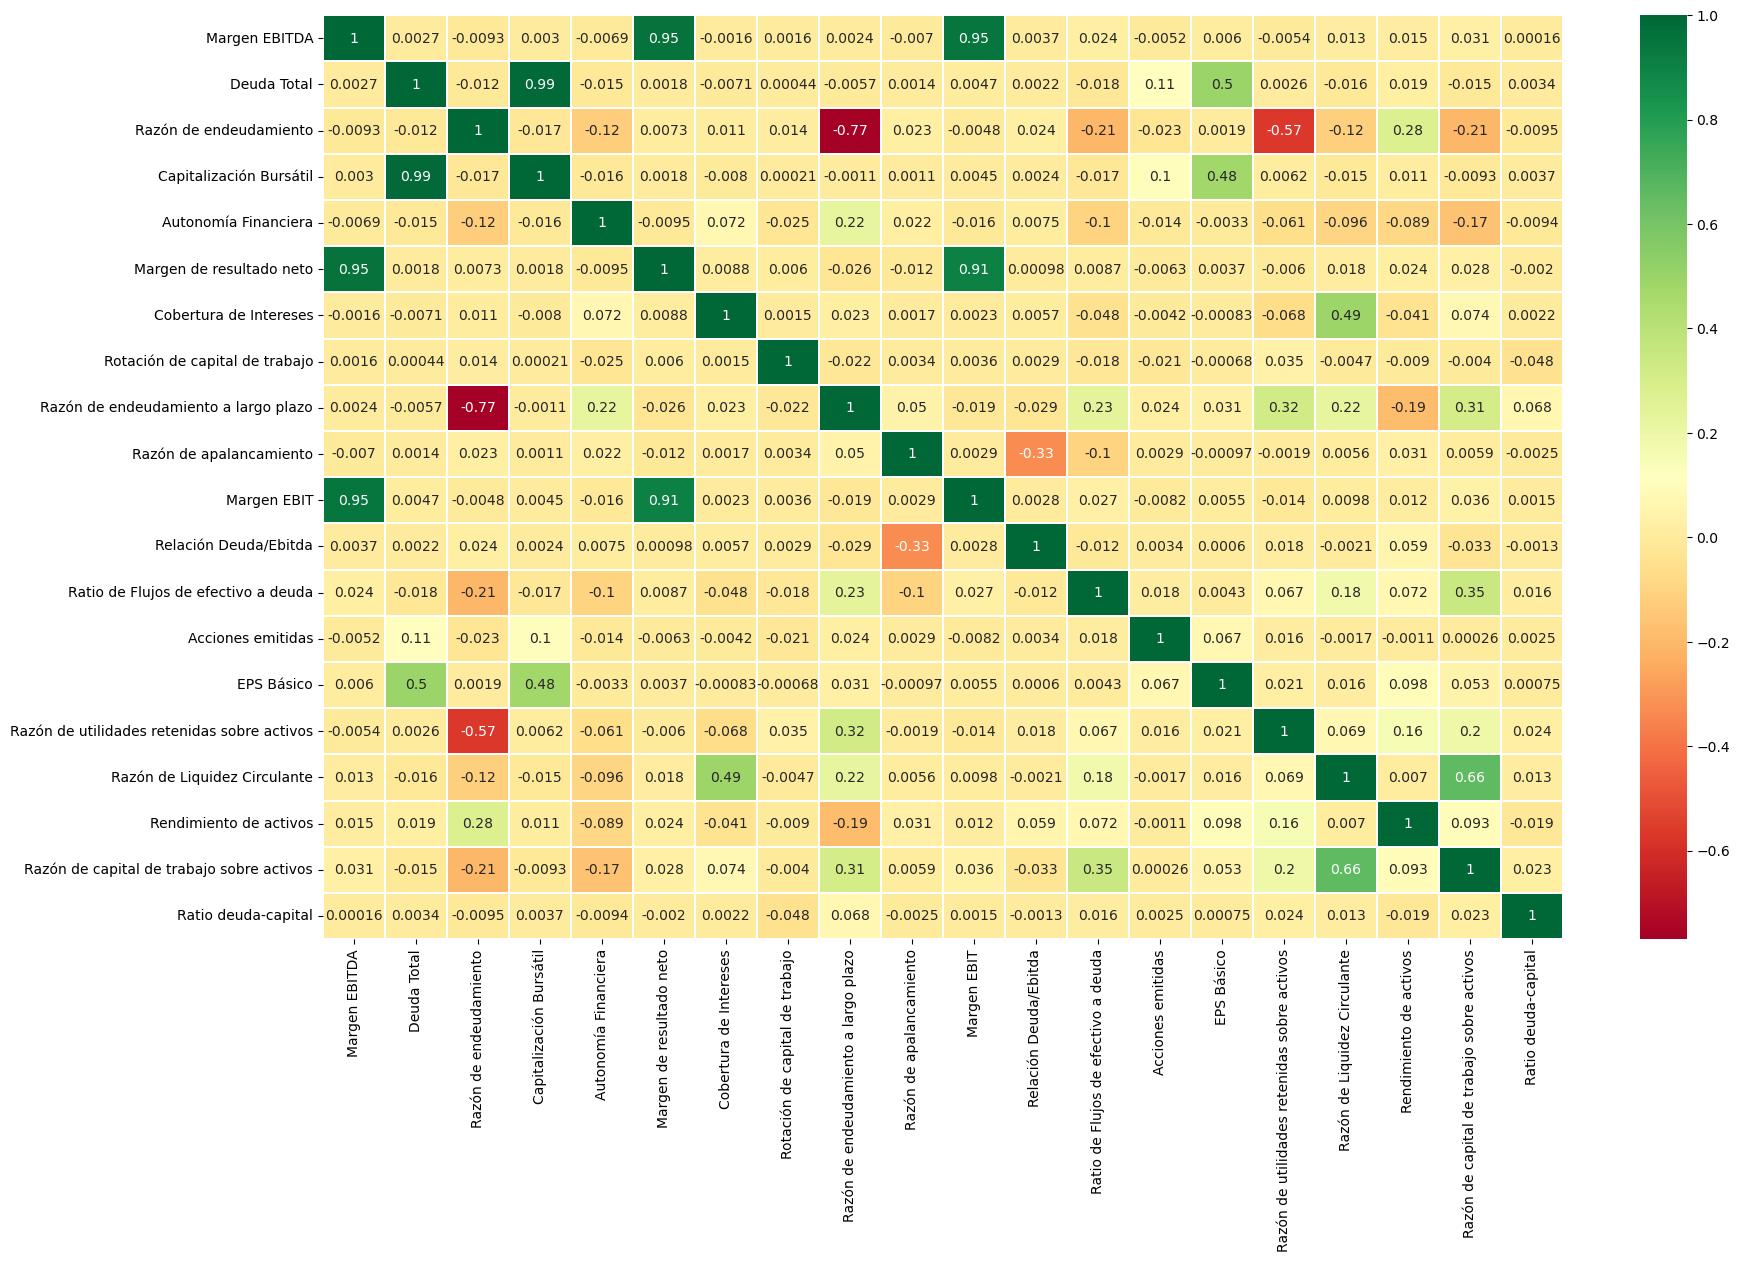

In [13]:
plt.figure(figsize=(20, 12))
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()

In [14]:
X = df.drop(['Calificación','Grupo','Capitalización Bursátil'], axis=1)
y = df['Calificación']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print ('Train set', X_train.shape,  y_train.shape)
print ('Test set', X_test.shape,  y_test.shape)

Train set (494, 19) (494,)
Test set (124, 19) (124,)


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}

In [18]:
model = DecisionTreeClassifier()

In [19]:
search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')

In [20]:
search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [21]:
search.best_params_

{'max_depth': 3, 'max_features': 'sqrt'}

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=2)

n_estimators = 39
Bag = BaggingClassifier(base_classifier, n_estimators=n_estimators, random_state=2, bootstrap=True)

In [23]:
Bag.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=10,
                                                   random_state=2),
                  n_estimators=39, random_state=2)

In [24]:
Bag.predict(X_test).shape

(124,)

In [25]:
print(get_accuracy(X_train, X_test, y_train, y_test,  Bag))

{'Precisión de prueba': 0.6290322580645161, 'Precisión de entrenamiento': 1.0}


In [26]:
get_correlation(X_test, y_test,Bag).style.background_gradient(cmap='coolwarm')

Correlación promedio entre predictores:  0.2075872339483722


,estimator 1,estimator 2,estimator 3,estimator 4,estimator 5,estimator 6,estimator 7,estimator 8,estimator 9,estimator 10,estimator 11,estimator 12,estimator 13,estimator 14,estimator 15,estimator 16,estimator 17,estimator 18,estimator 19,estimator 20,estimator 21,estimator 22,estimator 23,estimator 24,estimator 25,estimator 26,estimator 27,estimator 28,estimator 29,estimator 30,estimator 31,estimator 32,estimator 33,estimator 34,estimator 35,estimator 36,estimator 37,estimator 38,estimator 39
estimator 1,1.000000,0.025774,0.025776,0.065535,0.331892,0.241085,0.190216,-0.071815,-0.011991,0.289470,0.016445,0.172478,0.220965,-0.035658,0.084425,0.050929,0.207834,0.286276,0.040666,-0.047542,0.145621,0.040609,0.045776,0.079134,0.103903,0.213059,0.027036,0.179477,-0.040833,0.301078,0.081073,0.095302,0.036010,-0.004386,0.004476,0.207825,-0.011964,0.190490,0.061810
estimator 2,0.025774,1.000000,0.018952,0.190932,0.265397,0.198776,0.263104,0.295221,0.183066,0.150069,0.215081,0.156740,0.072951,0.104275,0.160413,0.215103,0.214107,0.193873,0.345947,0.189861,0.072529,-0.046879,0.144148,0.186153,0.008959,0.298208,0.050260,0.233779,0.169657,0.031333,0.143421,0.142682,-0.011037,0.209696,0.275727,0.037849,0.134502,0.188800,0.160170
estimator 3,0.025776,0.018952,1.000000,0.278756,0.015862,0.147180,0.222981,0.397782,0.424308,0.243008,0.307229,0.129001,0.176164,0.279671,0.273299,0.214001,0.115465,0.196360,0.302178,0.165013,0.162932,0.267502,0.225853,0.226065,0.235201,0.184551,0.317261,0.290516,0.237817,0.322825,0.218097,0.139878,0.368024,0.129537,0.275891,0.245206,0.287658,0.363733,0.136692
estimator 4,0.065535,0.190932,0.278756,1.000000,0.185704,0.260492,0.341699,0.478333,0.507581,0.241810,0.322345,0.346390,0.268779,0.271363,0.413759,0.253354,0.289384,0.250071,0.385995,0.013516,0.281872,0.356773,0.319864,0.312642,0.272005,0.282860,0.314707,0.334325,0.450335,0.345982,0.352135,0.449266,0.296080,0.396160,0.655515,0.316871,0.432163,0.395035,0.332934
estimator 5,0.331892,0.265397,0.015862,0.185704,1.000000,0.157252,0.254887,0.072546,0.008651,0.124220,0.116599,0.096149,0.181903,0.018939,0.203305,0.138744,0.290249,0.290808,0.156630,0.141414,0.042249,-0.097705,0.186401,0.110020,0.061179,0.122508,0.165614,0.132031,-0.011461,0.014258,0.108213,0.140097,-0.019666,0.279499,0.096111,0.125478,0.064811,0.134578,0.120527
estimator 6,0.241085,0.198776,0.147180,0.260492,0.157252,1.000000,0.198370,0.046370,0.296256,0.097268,0.086650,0.132245,0.116398,0.085001,0.133673,0.053195,0.142540,0.414274,0.223017,0.126089,0.225286,0.174446,0.017815,0.098064,0.008189,0.297338,0.250624,0.122987,-0.026196,0.330374,0.211531,0.134608,0.089647,0.072247,0.225379,0.198335,0.141250,0.122436,0.069452
estimator 7,0.190216,0.263104,0.222981,0.341699,0.254887,0.198370,1.000000,0.188663,0.241341,0.281158,0.308188,0.206309,0.122674,0.268769,0.411598,0.231775,0.408070,0.311038,0.173289,0.267546,-0.012212,0.117733,0.200043,0.193355,0.130717,0.174094,0.261246,0.319537,0.057937,0.181148,0.271995,0.324112,0.176354,0.382639,0.372600,0.302563,0.249724,0.138257,0.256691
estimator 8,-0.071815,0.295221,0.397782,0.478333,0.072546,0.046370,0.188663,1.000000,0.467339,0.250955,0.276226,0.182451,0.154760,0.296931,0.338966,0.314075,0.250422,0.218149,0.329704,0.202942,0.120273,0.122728,0.223929,0.204881,0.190824,0.077212,0.237906,0.350243,0.488646,0.242121,0.246938,0.164591,0.235227,0.184187,0.392400,0.190308,0.363078,0.467769,0.187003
estimator 9,-0.011991,0.183066,0.424308,0.507581,0.008651,0.296256,0.241341,0.467339,1.000000,0.180226,0.563204,0.318298,0.241112,0.133967,0.406117,0.166658,0.174727,0.321527,0.442047,0.113850,0.357164,0.194936,0.455111,0.416645,0.118199,0.255969,0.320462,0.427132,0.336492,0.279964,0.308566,0.288039,0.494594,0.217171,0.410694,0.413515,0.405721,0.513103,0.238655
estimator 10,0.289470,0.150069,0.243008,0.241810,0.124220,0.097268,0.281158,0.250955,0.180226,1.000000,0.149973,0.284285,0.100482,0.249259,0.083705,0.038433,0.348896,0.252512,0.246134,0.079952,0.224449,0.293385,0.38241

In [27]:
feature_names = X.columns.tolist()

feature_importance = np.mean([tree.feature_importances_ for tree in Bag.estimators_], axis=0)

feature_importance_with_names = list(zip(feature_names, feature_importance))

feature_importance_with_names_sorted = sorted(feature_importance_with_names, key=lambda x: x[1], reverse=True)

print("Feature Importance (sorted):")
for name, importance in feature_importance_with_names_sorted:
    print(name, ":", importance)

Feature Importance (sorted):
Relación Deuda/Ebitda : 0.19927772546835998
Razón de apalancamiento : 0.07672476011439386
Acciones emitidas : 0.0653465560625428
Razón de endeudamiento : 0.0634962804270479
Rendimiento de activos : 0.054607660636916806
Margen EBIT : 0.05409911052162858
Margen de resultado neto : 0.052825663503839694
Razón de utilidades retenidas sobre activos : 0.052767175188954595
Ratio de Flujos de efectivo a deuda : 0.05138653380506724
Deuda Total : 0.0454951922636127
Margen EBITDA : 0.04112324896173555
Rotación de capital de trabajo : 0.037099058421684865
EPS Básico : 0.03610659518499874
Cobertura de Intereses : 0.03345771130605712
Ratio deuda-capital : 0.030632870616634937
Autonomía Financiera : 0.029761667089965797
Razón de endeudamiento a largo plazo : 0.028216173589853677
Razón de capital de trabajo sobre activos : 0.02487200641341192
Razón de Liquidez Circulante : 0.02270401042329331


In [28]:
y_pred = Bag.predict(X_test)
report = classification_report(y_test, y_pred)

# Mostrar el informe de clasificación
print("Informe de Clasificación para Bagging:")
print(report)

Informe de Clasificación para Bagging:
              precision    recall  f1-score   support

           A       0.62      0.35      0.44        23
          AA       0.00      0.00      0.00         2
         AAA       0.00      0.00      0.00         3
           B       1.00      0.29      0.44         7
          BB       0.82      0.47      0.60        30
         BBB       0.60      0.95      0.73        57
          CC       0.00      0.00      0.00         1
         CCC       0.00      0.00      0.00         1

    accuracy                           0.63       124
   macro avg       0.38      0.26      0.28       124
weighted avg       0.65      0.63      0.59       124



In [29]:
M_features=X.shape[1]
max_features=round(np.sqrt(M_features))
max_features

4

In [30]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}

In [31]:
from sklearn.ensemble import RandomForestClassifier
search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, scoring='accuracy')

In [32]:
search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [33]:
search.best_params_

{'max_depth': 15, 'max_features': 'log2', 'n_estimators': 27}

In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier( max_features=4, max_depth=9, n_estimators=33, random_state=4)

In [35]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, max_features=4, n_estimators=33,
                       random_state=4)

In [36]:
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'Precisión de prueba': 0.6451612903225806, 'Precisión de entrenamiento': 0.9635627530364372}


In [37]:
get_correlation(X_test, y_test,model).style.background_gradient(cmap='coolwarm')

Correlación promedio entre predictores:  0.19907608188928


,estimator 1,estimator 2,estimator 3,estimator 4,estimator 5,estimator 6,estimator 7,estimator 8,estimator 9,estimator 10,estimator 11,estimator 12,estimator 13,estimator 14,estimator 15,estimator 16,estimator 17,estimator 18,estimator 19,estimator 20,estimator 21,estimator 22,estimator 23,estimator 24,estimator 25,estimator 26,estimator 27,estimator 28,estimator 29,estimator 30,estimator 31,estimator 32,estimator 33
estimator 1,1.000000,0.096435,0.101261,0.115023,0.387935,0.315035,0.241966,0.202882,0.211405,0.060997,0.032825,0.135218,0.158732,0.152443,0.203695,0.255309,0.109997,0.177675,0.264672,0.175194,0.356887,0.223476,0.200559,0.142738,0.256014,0.208228,0.291085,0.210919,0.226495,0.214319,0.055604,0.188925,0.539359
estimator 2,0.096435,1.000000,0.081634,0.272860,0.051773,0.100101,0.031367,0.109210,0.069429,0.164097,0.074969,0.041885,0.109731,0.265331,0.145532,0.117264,-0.055377,0.040963,0.152693,0.197430,0.129438,0.120315,0.081055,0.347329,0.094931,0.182697,0.163106,0.249543,0.189736,0.156934,0.062501,0.126701,0.110833
estimator 3,0.101261,0.081634,1.000000,0.200583,0.135065,0.147360,-0.055671,0.117911,0.393988,0.161612,0.139179,0.181049,-0.022312,0.240965,0.179077,0.161868,0.055500,0.181971,-0.022637,0.176904,-0.008683,0.158066,0.178790,0.073772,0.333760,0.163089,0.267598,0.126239,0.163088,0.102101,0.252583,0.213040,0.236403
estimator 4,0.115023,0.272860,0.200583,1.000000,0.083921,0.161712,-0.202846,0.166556,0.277448,0.223291,0.195589,0.343702,0.264613,0.157209,0.119304,0.052894,0.071727,0.152312,0.203042,0.194185,0.101159,0.142649,0.357486,0.278807,0.251877,0.212880,0.182826,0.264525,0.231305,0.250736,0.220781,0.113257,0.303719
estimator 5,0.387935,0.051773,0.135065,0.083921,1.000000,0.509471,0.172088,0.262489,0.129800,0.090514,0.144801,0.169471,0.269043,0.170694,0.378000,0.284793,0.180504,0.157470,0.378622,0.438673,0.402492,0.333437,0.122439,0.304728,0.324306,0.303709,0.284083,0.296001,0.388537,0.188070,0.042666,0.361293,0.358922
estimator 6,0.315035,0.100101,0.147360,0.161712,0.509471,1.000000,0.163824,0.470227,0.267524,0.156988,0.191024,0.311210,0.329755,0.383172,0.416068,0.390872,0.154500,0.222281,0.395773,0.418166,0.493145,0.321081,0.140110,0.289833,0.247914,0.358378,0.306552,0.289723,0.447888,0.200178,-0.025712,0.308049,0.252488
estimator 7,0.241966,0.031367,-0.055671,-0.202846,0.172088,0.163824,1.000000,0.101428,0.101324,0.022373,-0.021684,0.132395,0.006713,0.101644,0.375937,0.208309,-0.063823,-0.016176,0.048740,0.140902,0.124401,0.168057,0.066511,0.139585,0.091971,0.086129,0.156885,0.089897,0.252776,0.000474,0.017696,0.087168,0.111232
estimator 8,0.202882,0.109210,0.117911,0.166556,0.262489,0.470227,0.101428,1.000000,0.073759,0.030921,0.056948,0.287275,0.265725,0.150941,0.233370,0.193538,0.067277,0.228399,0.376014,0.200444,0.395827,0.279599,0.053019,0.325200,0.181065,0.139161,0.248411,0.102408,0.316704,0.175583,-0.068330,0.139513,0.212382
estimator 9,0.211405,0.069429,0.393988,0.277448,0.129800,0.267524,0.101324,0.073759,1.000000,0.159010,0.268009,0.369337,0.070654,0.475152,0.294490,0.217467,0.257535,0.207254,0.174041,0.231054,0.133671,0.131019,0.191546,0.116595,0.245793,0.134517,0.346895,0.265223,0.356023,0.226512,0.052867,0.207087,0.300482
estimator 10,0.060997,0.164097,0.161612,0.223291,0.090514,0.156988,0.022373,0.030921,0.159010,1.000000,0.123659,0.226814,0.300845,0.217518,0.192554,0.235467,0.012325,0.042575,0.072077,0.116942,0.057968,0.130438,0.296998,0.016871,0.123396,0.322196,0.032472,0.166063,0.139733,0.088548,0.034139,0.201972,0.233740


In [38]:
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Relación Deuda/Ebitda                          0.118260
Deuda Total                                    0.068709
Razón de endeudamiento                         0.064200
Acciones emitidas                              0.061158
Margen de resultado neto                       0.054893
Margen EBIT                                    0.052497
Razón de utilidades retenidas sobre activos    0.051583
Rendimiento de activos                         0.051533
Ratio de Flujos de efectivo a deuda            0.051302
Margen EBITDA                                  0.048498
Razón de apalancamiento                        0.048315
EPS Básico                                     0.048104
Rotación de capital de trabajo                 0.045935
Razón de endeudamiento a largo plazo           0.043690
Ratio deuda-capital                            0.041899
Cobertura de Intereses                         0.041872
Autonomía Financiera                           0.041176
Razón de capital de trabajo sobre activos      0

In [39]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

# Mostrar el informe de clasificación
print("Informe de Clasificación para Random Forest:")
print(report)

Informe de Clasificación para Random Forest:
              precision    recall  f1-score   support

           A       0.77      0.43      0.56        23
          AA       0.00      0.00      0.00         2
         AAA       0.00      0.00      0.00         3
           B       0.00      0.00      0.00         7
          BB       0.65      0.57      0.61        30
         BBB       0.63      0.93      0.75        57
          CC       0.00      0.00      0.00         1
         CCC       0.00      0.00      0.00         1

    accuracy                           0.65       124
   macro avg       0.26      0.24      0.24       124
weighted avg       0.59      0.65      0.60       124



### KNN

In [40]:

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [41]:
data = '/Users/andresrendon/Documents/Actuaria/01 Semestres/9sem/Practicum/0Archivos/Base final.xlsx'


df = pd.read_excel(data,sheet_name='INDICES')

df = df.drop(columns=['EMPRESA'])
df.head()

,Margen EBITDA,Deuda Total,Razón de endeudamiento,Capitalización Bursátil,Autonomía Financiera,Margen de resultado neto,Cobertura de Intereses,Rotación de capital de trabajo,Razón de endeudamiento a largo plazo,Razón de apalancamiento,...,Ratio de Flujos de efectivo a deuda,Acciones emitidas,EPS Básico,Razón de utilidades retenidas sobre activos,Razón de Liquidez Circulante,Rendimiento de activos,Razón de capital de trabajo sobre activos,Ratio deuda-capital,Calificación,Grupo
0,2.938439,1.356110e+11,0.401827,2.601890e+11,1.171302,0.104585,0.006616,4.092682,0.382445,-0.410953,...,0.541158,10757000000,2.95,0.215245,1.045077,0.169369,0.014083,0.671757,AA,Consumer Cyclical
1,1.331904,1.110880e+11,0.641260,1.574270e+11,0.432874,0.040548,0.018367,-55.680253,0.176259,-0.251401,...,0.269741,15550061000,6.16,-0.000607,0.988012,0.366405,-0.004941,1.787533,AA,Technology
2,1.452993,5.996500e+10,0.225273,2.482130e+11,1.119214,0.027197,0.029880,0.903293,0.500570,-1.182157,...,0.578738,7432000000,9.72,0.288483,1.769167,0.255209,0.194448,0.290777,AAA,Technology
3,0.986466,9.573000e+09,0.130811,6.531600e+10,1.282026,0.010401,0.001972,0.718756,0.587462,-2.706340,...,1.712943,3185000000,0.00,0.261513,1.725894,0.138776,0.195727,0.152840,BBB,Consumer Cyclical
4,1.327610,2.850400e+10,0.091393,2.952490e+11,1.652067,0.004174,0.002310,0.822540,0.704236,-1.459881,...,0.843671,12460000000,5.84,0.524978,2.096585,0.243472,0.222957,0.100586,AA,Communication Services


In [42]:
columnas_numericas = df.columns[df.dtypes != 'object'].tolist()
promedios_por_grupo = df.groupby('Grupo')[columnas_numericas].agg('mean')

In [43]:
for columna in columnas_numericas:
    for grupo, promedio in promedios_por_grupo[columna].items():
        df.loc[df['Grupo'] == grupo, columna] = df.loc[df['Grupo'] == grupo, columna].fillna(promedio)

In [44]:
X = df.drop(['Calificación','Grupo','Capitalización Bursátil'], axis=1)
y = df['Calificación']

In [45]:
scaler = MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(np.array(X))

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print ('Train set', X_train.shape,  y_train.shape)
print ('Test set', X_test.shape,  y_test.shape)

Train set (494, 19) (494,)
Test set (124, 19) (124,)


In [47]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean',algorithm='auto')
knn_model = knn.fit(X_train, y_train)
knn_model
print(knn_model)

KNeighborsClassifier(metric='euclidean')


In [48]:
y_pred = knn_model.predict(X_test)

In [49]:
print(accuracy_score(y_test, y_pred))

0.43548387096774194


In [50]:
report = classification_report(y_test, y_pred)

# Mostrar el informe de clasificación
print("Informe de Clasificación para k-NN:")
print(report)

Informe de Clasificación para k-NN:
              precision    recall  f1-score   support

           A       0.29      0.22      0.25        23
          AA       0.00      0.00      0.00         2
         AAA       0.00      0.00      0.00         3
           B       1.00      0.14      0.25         7
          BB       0.31      0.27      0.29        30
         BBB       0.50      0.70      0.58        57
          CC       0.00      0.00      0.00         1
         CCC       0.00      0.00      0.00         1

    accuracy                           0.44       124
   macro avg       0.26      0.17      0.17       124
weighted avg       0.42      0.44      0.40       124



## XGBoost

In [51]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [52]:
data = '/Users/andresrendon/Documents/Actuaria/01 Semestres/9sem/Practicum/0Archivos/Base final.xlsx'


df = pd.read_excel(data,sheet_name='INDICES')

df = df.drop(columns=['EMPRESA'])
df.head()

,Margen EBITDA,Deuda Total,Razón de endeudamiento,Capitalización Bursátil,Autonomía Financiera,Margen de resultado neto,Cobertura de Intereses,Rotación de capital de trabajo,Razón de endeudamiento a largo plazo,Razón de apalancamiento,...,Ratio de Flujos de efectivo a deuda,Acciones emitidas,EPS Básico,Razón de utilidades retenidas sobre activos,Razón de Liquidez Circulante,Rendimiento de activos,Razón de capital de trabajo sobre activos,Ratio deuda-capital,Calificación,Grupo
0,2.938439,1.356110e+11,0.401827,2.601890e+11,1.171302,0.104585,0.006616,4.092682,0.382445,-0.410953,...,0.541158,10757000000,2.95,0.215245,1.045077,0.169369,0.014083,0.671757,AA,Consumer Cyclical
1,1.331904,1.110880e+11,0.641260,1.574270e+11,0.432874,0.040548,0.018367,-55.680253,0.176259,-0.251401,...,0.269741,15550061000,6.16,-0.000607,0.988012,0.366405,-0.004941,1.787533,AA,Technology
2,1.452993,5.996500e+10,0.225273,2.482130e+11,1.119214,0.027197,0.029880,0.903293,0.500570,-1.182157,...,0.578738,7432000000,9.72,0.288483,1.769167,0.255209,0.194448,0.290777,AAA,Technology
3,0.986466,9.573000e+09,0.130811,6.531600e+10,1.282026,0.010401,0.001972,0.718756,0.587462,-2.706340,...,1.712943,3185000000,0.00,0.261513,1.725894,0.138776,0.195727,0.152840,BBB,Consumer Cyclical
4,1.327610,2.850400e+10,0.091393,2.952490e+11,1.652067,0.004174,0.002310,0.822540,0.704236,-1.459881,...,0.843671,12460000000,5.84,0.524978,2.096585,0.243472,0.222957,0.100586,AA,Communication Services


In [53]:
X = df.drop(['Calificación','Grupo','Capitalización Bursátil'], axis=1)
y = df['Calificación']

In [54]:
y2 = y

In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
all_labels = y
label_encoder.fit(all_labels)

y = label_encoder.transform(y)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data, columns=X.columns)

In [57]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set', X_train.shape,  y_train.shape)
print ('Test set', X_test.shape,  y_test.shape)

Train set (494, 19) (494,)
Test set (124, 19) (124,)


In [58]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

In [59]:
param_grid = {
    'max_depth': [3, 6, 9],  # Profundidades máximas del árbol a probar
    'min_child_weight': [1, 5, 10],  # Pesos mínimos de los hijos a probar
    'gamma': [0.5, 1, 1.5],  # Valor de corte mínimo necesario para realizar una división a probar
    'subsample': [0.6, 0.8, 1.0],  # Submuestreo de filas a probar
    'colsample_bytree': [0.6, 0.8, 1.0],  # Submuestreo de columnas a probar
    'learning_rate': [0.01, 0.1, 0.3]  # Tasa de aprendizaje a probar
}

In [60]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0.1, 0.5, 1, 1.5, 2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.3],
}

# Inicializar el clasificador XGBoost
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=19, eval_metric='merror', random_state=0)

# Crear un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_dist, n_iter=50, cv=3, scoring='accuracy', verbose=2, random_state=4, n_jobs=-1)

# Realizar la búsqueda aleatoria en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", random_search.best_params_)

# Evaluar el modelo con los mejores parámetros en los datos de prueba
accuracy = random_search.best_estimator_.score(X_test, y_test)
print("Exactitud del modelo con mejores parámetros:", accuracy)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Mejores parámetros: {'subsample': 0.6, 'min_child_weight': 7, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}
Exactitud del modelo con mejores parámetros: 0.5967741935483871


In [61]:
num_classes = len(np.unique(y_train))
params = {
    'objective': 'multi:softmax',  # La función de pérdida para problemas de clasificación multiclase
    'num_class': num_classes,  # Número de clases en la variable objetivo
    'max_depth': 3,  # Profundidad máxima del árbol
    'min_child_weight': 1,  # Peso mínimo de los hijos
    'gamma': 0.5,  # Valor de corte mínimo necesario para realizar una división
    'subsample': 1,  # Submuestreo de filas
    'colsample_bytree': 1,  # Submuestreo de columnas
    'learning_rate': 0.1, 
    'eval_metric': 'merror', 
    'random_state': 4
}

In [62]:
model = xgb.XGBClassifier(**params)

In [63]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='merror', feature_types=None, gamma=0.5,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=8,
              num_parallel_tree=None, ...)

In [64]:
prueba = model.predict(X_train)

In [65]:
accuracy1 = accuracy_score(y_train, prueba)
print("Precisión del modelo:", accuracy1)

Precisión del modelo: 0.9433198380566802


In [66]:
predictions = model.predict(X_test)

In [67]:
accuracy = accuracy_score(y_test, predictions)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.6209677419354839


In [68]:
X_train, X_test, y2_train, y2_test = train_test_split( X, y2, test_size=0.2, random_state=10)

In [69]:
from sklearn.preprocessing import LabelEncoder

# Suponiendo que ya has utilizado LabelEncoder para codificar las etiquetas
label_encoder = LabelEncoder()

# Entrenar el LabelEncoder y transformar las etiquetas
y2_train_encoded = label_encoder.fit_transform(y2_train)

# Obtener las clases originales
original_classes = label_encoder.classes_

# Obtener las clases transformadas (codificadas)
transformed_classes = label_encoder.transform(label_encoder.classes_)

# Imprimir la equivalencia entre las clases originales y las transformadas
for original, transformed in zip(original_classes, transformed_classes):
    print(f"{transformed} | {original}")


0 | A
1 | AA
2 | AAA
3 | B
4 | BB
5 | BBB
6 | CC
7 | CCC


In [70]:
# Mostrar el reporte de clasificación
y_pred = model.predict(X_test)
print("\nReporte de clasificación para XGBoost:")
print(classification_report(y_test, predictions))


Reporte de clasificación para XGBoost:
              precision    recall  f1-score   support

           0       0.41      0.37      0.39        19
           1       0.50      0.20      0.29         5
           3       1.00      0.17      0.29         6
           4       0.71      0.57      0.63        30
           5       0.64      0.80      0.71        64

    accuracy                           0.62       124
   macro avg       0.65      0.42      0.46       124
weighted avg       0.63      0.62      0.60       124



In [71]:
# Mostrar la matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, predictions))


Matriz de confusión:
[[ 7  0  0  0 12]
 [ 3  1  0  0  1]
 [ 0  1  1  1  3]
 [ 0  0  0 17 13]
 [ 7  0  0  6 51]]


In [72]:
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Relación Deuda/Ebitda                          0.123675
Razón de utilidades retenidas sobre activos    0.068548
Razón de apalancamiento                        0.062377
Ratio de Flujos de efectivo a deuda            0.060520
Deuda Total                                    0.056011
Razón de endeudamiento                         0.054899
Autonomía Financiera                           0.053526
Margen de resultado neto                       0.053324
Margen EBIT                                    0.048664
Ratio deuda-capital                            0.047523
Cobertura de Intereses                         0.046417
Acciones emitidas                              0.046173
Razón de endeudamiento a largo plazo           0.045092
Rendimiento de activos                         0.044252
Margen EBITDA                                  0.044009
Razón de capital de trabajo sobre activos      0.041330
Razón de Liquidez Circulante                   0.038039
Rotación de capital de trabajo                 0

# Siguiendo el principio de parsimonia y eliminando las últimas 5 variables

### Bagging

In [86]:
data = '/Users/andresrendon/Documents/Actuaria/01 Semestres/9sem/Practicum/0Archivos/Base final.xlsx'


df = pd.read_excel(data,sheet_name='INDICES')

df = df.drop(columns=['EMPRESA'])
df.head()

,Margen EBITDA,Deuda Total,Razón de endeudamiento,Capitalización Bursátil,Autonomía Financiera,Margen de resultado neto,Cobertura de Intereses,Rotación de capital de trabajo,Razón de endeudamiento a largo plazo,Razón de apalancamiento,...,Ratio de Flujos de efectivo a deuda,Acciones emitidas,EPS Básico,Razón de utilidades retenidas sobre activos,Razón de Liquidez Circulante,Rendimiento de activos,Razón de capital de trabajo sobre activos,Ratio deuda-capital,Calificación,Grupo
0,2.938439,1.356110e+11,0.401827,2.601890e+11,1.171302,0.104585,0.006616,4.092682,0.382445,-0.410953,...,0.541158,10757000000,2.95,0.215245,1.045077,0.169369,0.014083,0.671757,AA,Consumer Cyclical
1,1.331904,1.110880e+11,0.641260,1.574270e+11,0.432874,0.040548,0.018367,-55.680253,0.176259,-0.251401,...,0.269741,15550061000,6.16,-0.000607,0.988012,0.366405,-0.004941,1.787533,AA,Technology
2,1.452993,5.996500e+10,0.225273,2.482130e+11,1.119214,0.027197,0.029880,0.903293,0.500570,-1.182157,...,0.578738,7432000000,9.72,0.288483,1.769167,0.255209,0.194448,0.290777,AAA,Technology
3,0.986466,9.573000e+09,0.130811,6.531600e+10,1.282026,0.010401,0.001972,0.718756,0.587462,-2.706340,...,1.712943,3185000000,0.00,0.261513,1.725894,0.138776,0.195727,0.152840,BBB,Consumer Cyclical
4,1.327610,2.850400e+10,0.091393,2.952490e+11,1.652067,0.004174,0.002310,0.822540,0.704236,-1.459881,...,0.843671,12460000000,5.84,0.524978,2.096585,0.243472,0.222957,0.100586,AA,Communication Services


In [87]:
columnas_numericas = df.columns[df.dtypes != 'object'].tolist()
promedios_por_grupo = df.groupby('Grupo')[columnas_numericas].agg('mean')

In [88]:
for columna in columnas_numericas:
    for grupo, promedio in promedios_por_grupo[columna].items():
        df.loc[df['Grupo'] == grupo, columna] = df.loc[df['Grupo'] == grupo, columna].fillna(promedio)

In [89]:
X = df.drop(['Calificación','Grupo','Capitalización Bursátil','Razón de Liquidez Circulante',
             'Razón de capital de trabajo sobre activos', 'Razón de endeudamiento a largo plazo',
            'Autonomía Financiera','Ratio deuda-capital'], axis=1)
y = df['Calificación']

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data, columns=X.columns)

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [92]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=2)

n_estimators = 39
Bag = BaggingClassifier(base_classifier, n_estimators=n_estimators, random_state=2, bootstrap=True)

In [93]:
Bag.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=10,
                                                   random_state=2),
                  n_estimators=39, random_state=2)

In [94]:
print(get_accuracy(X_train, X_test, y_train, y_test,  Bag))

{'Precisión de prueba': 0.6370967741935484, 'Precisión de entrenamiento': 1.0}


In [95]:
feature_names = X.columns.tolist()

feature_importance = np.mean([tree.feature_importances_ for tree in Bag.estimators_], axis=0)

feature_importance_with_names = list(zip(feature_names, feature_importance))

feature_importance_with_names_sorted = sorted(feature_importance_with_names, key=lambda x: x[1], reverse=True)

print("Feature Importance (sorted):")
for name, importance in feature_importance_with_names_sorted:
    print(name, ":", importance)

Feature Importance (sorted):
Relación Deuda/Ebitda : 0.21044238551138655
Razón de endeudamiento : 0.09221339855803885
Razón de apalancamiento : 0.08287836762402395
Acciones emitidas : 0.06956243739878618
Margen de resultado neto : 0.0664500418155586
Margen EBIT : 0.06456708901431567
Rendimiento de activos : 0.06428939169420159
Ratio de Flujos de efectivo a deuda : 0.06218117663806156
Razón de utilidades retenidas sobre activos : 0.05360143175637283
Deuda Total : 0.0526657941993517
EPS Básico : 0.04802138804565318
Margen EBITDA : 0.0468928724483653
Rotación de capital de trabajo : 0.04670670330103772
Cobertura de Intereses : 0.03952752199484634


In [96]:
y_pred = Bag.predict(X_test)
report = classification_report(y_test, y_pred)

# Mostrar el informe de clasificación
print("Informe de Clasificación para Bagging:")
print(report)

Informe de Clasificación para Bagging:
              precision    recall  f1-score   support

           A       0.62      0.43      0.51        23
          AA       0.00      0.00      0.00         2
         AAA       0.00      0.00      0.00         3
           B       1.00      0.14      0.25         7
          BB       0.71      0.50      0.59        30
         BBB       0.62      0.93      0.75        57
          CC       0.00      0.00      0.00         1
         CCC       0.00      0.00      0.00         1

    accuracy                           0.64       124
   macro avg       0.37      0.25      0.26       124
weighted avg       0.63      0.64      0.59       124



### Random Forest

In [97]:
data = '/Users/andresrendon/Documents/Actuaria/01 Semestres/9sem/Practicum/0Archivos/Base final.xlsx'


df = pd.read_excel(data,sheet_name='INDICES')

df = df.drop(columns=['EMPRESA'])
df.head()

,Margen EBITDA,Deuda Total,Razón de endeudamiento,Capitalización Bursátil,Autonomía Financiera,Margen de resultado neto,Cobertura de Intereses,Rotación de capital de trabajo,Razón de endeudamiento a largo plazo,Razón de apalancamiento,...,Ratio de Flujos de efectivo a deuda,Acciones emitidas,EPS Básico,Razón de utilidades retenidas sobre activos,Razón de Liquidez Circulante,Rendimiento de activos,Razón de capital de trabajo sobre activos,Ratio deuda-capital,Calificación,Grupo
0,2.938439,1.356110e+11,0.401827,2.601890e+11,1.171302,0.104585,0.006616,4.092682,0.382445,-0.410953,...,0.541158,10757000000,2.95,0.215245,1.045077,0.169369,0.014083,0.671757,AA,Consumer Cyclical
1,1.331904,1.110880e+11,0.641260,1.574270e+11,0.432874,0.040548,0.018367,-55.680253,0.176259,-0.251401,...,0.269741,15550061000,6.16,-0.000607,0.988012,0.366405,-0.004941,1.787533,AA,Technology
2,1.452993,5.996500e+10,0.225273,2.482130e+11,1.119214,0.027197,0.029880,0.903293,0.500570,-1.182157,...,0.578738,7432000000,9.72,0.288483,1.769167,0.255209,0.194448,0.290777,AAA,Technology
3,0.986466,9.573000e+09,0.130811,6.531600e+10,1.282026,0.010401,0.001972,0.718756,0.587462,-2.706340,...,1.712943,3185000000,0.00,0.261513,1.725894,0.138776,0.195727,0.152840,BBB,Consumer Cyclical
4,1.327610,2.850400e+10,0.091393,2.952490e+11,1.652067,0.004174,0.002310,0.822540,0.704236,-1.459881,...,0.843671,12460000000,5.84,0.524978,2.096585,0.243472,0.222957,0.100586,AA,Communication Services


In [98]:
columnas_numericas = df.columns[df.dtypes != 'object'].tolist()
promedios_por_grupo = df.groupby('Grupo')[columnas_numericas].agg('mean')

In [99]:
for columna in columnas_numericas:
    for grupo, promedio in promedios_por_grupo[columna].items():
        df.loc[df['Grupo'] == grupo, columna] = df.loc[df['Grupo'] == grupo, columna].fillna(promedio)

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data, columns=X.columns)

In [101]:
X = df.drop(['Calificación','Grupo','Capitalización Bursátil','Razón de Liquidez Circulante',
             'Razón de capital de trabajo sobre activos', 'Cobertura de Intereses',
            'Autonomía Financiera','Ratio deuda-capital'], axis=1)
y = df['Calificación']

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [103]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier( max_features=4, max_depth=9, n_estimators=33, random_state=4)

In [104]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, max_features=4, n_estimators=33,
                       random_state=4)

In [105]:
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'Precisión de prueba': 0.6048387096774194, 'Precisión de entrenamiento': 0.97165991902834}


In [106]:
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Relación Deuda/Ebitda                          0.159668
Razón de apalancamiento                        0.084786
Acciones emitidas                              0.079357
Margen de resultado neto                       0.077988
Deuda Total                                    0.074935
Razón de endeudamiento                         0.074665
Margen EBIT                                    0.072405
Razón de endeudamiento a largo plazo           0.058393
Ratio de Flujos de efectivo a deuda            0.058270
Razón de utilidades retenidas sobre activos    0.056083
EPS Básico                                     0.053973
Margen EBITDA                                  0.053146
Rendimiento de activos                         0.049489
Rotación de capital de trabajo                 0.046842
dtype: float64

In [107]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

# Mostrar el informe de clasificación
print("Informe de Clasificación para Random Forest:")
print(report)

Informe de Clasificación para Random Forest:
              precision    recall  f1-score   support

           A       0.64      0.30      0.41        23
          AA       0.00      0.00      0.00         2
         AAA       0.00      0.00      0.00         3
           B       0.00      0.00      0.00         7
          BB       0.59      0.53      0.56        30
         BBB       0.61      0.91      0.73        57
          CC       0.00      0.00      0.00         1
         CCC       0.00      0.00      0.00         1

    accuracy                           0.60       124
   macro avg       0.23      0.22      0.21       124
weighted avg       0.54      0.60      0.55       124



### KNN

In [108]:
data = '/Users/andresrendon/Documents/Actuaria/01 Semestres/9sem/Practicum/0Archivos/Base final.xlsx'


df = pd.read_excel(data,sheet_name='INDICES')

df = df.drop(columns=['EMPRESA'])
df.head()

,Margen EBITDA,Deuda Total,Razón de endeudamiento,Capitalización Bursátil,Autonomía Financiera,Margen de resultado neto,Cobertura de Intereses,Rotación de capital de trabajo,Razón de endeudamiento a largo plazo,Razón de apalancamiento,...,Ratio de Flujos de efectivo a deuda,Acciones emitidas,EPS Básico,Razón de utilidades retenidas sobre activos,Razón de Liquidez Circulante,Rendimiento de activos,Razón de capital de trabajo sobre activos,Ratio deuda-capital,Calificación,Grupo
0,2.938439,1.356110e+11,0.401827,2.601890e+11,1.171302,0.104585,0.006616,4.092682,0.382445,-0.410953,...,0.541158,10757000000,2.95,0.215245,1.045077,0.169369,0.014083,0.671757,AA,Consumer Cyclical
1,1.331904,1.110880e+11,0.641260,1.574270e+11,0.432874,0.040548,0.018367,-55.680253,0.176259,-0.251401,...,0.269741,15550061000,6.16,-0.000607,0.988012,0.366405,-0.004941,1.787533,AA,Technology
2,1.452993,5.996500e+10,0.225273,2.482130e+11,1.119214,0.027197,0.029880,0.903293,0.500570,-1.182157,...,0.578738,7432000000,9.72,0.288483,1.769167,0.255209,0.194448,0.290777,AAA,Technology
3,0.986466,9.573000e+09,0.130811,6.531600e+10,1.282026,0.010401,0.001972,0.718756,0.587462,-2.706340,...,1.712943,3185000000,0.00,0.261513,1.725894,0.138776,0.195727,0.152840,BBB,Consumer Cyclical
4,1.327610,2.850400e+10,0.091393,2.952490e+11,1.652067,0.004174,0.002310,0.822540,0.704236,-1.459881,...,0.843671,12460000000,5.84,0.524978,2.096585,0.243472,0.222957,0.100586,AA,Communication Services


In [109]:
columnas_numericas = df.columns[df.dtypes != 'object'].tolist()
promedios_por_grupo = df.groupby('Grupo')[columnas_numericas].agg('mean')

In [110]:
for columna in columnas_numericas:
    for grupo, promedio in promedios_por_grupo[columna].items():
        df.loc[df['Grupo'] == grupo, columna] = df.loc[df['Grupo'] == grupo, columna].fillna(promedio)

In [111]:
X = df.drop(['Calificación','Grupo','Capitalización Bursátil','Razón de Liquidez Circulante',
             'Razón de capital de trabajo sobre activos', 'Razón de endeudamiento a largo plazo',
            'Autonomía Financiera','Ratio deuda-capital'], axis=1)
y = df['Calificación']

In [112]:
scaler = MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(np.array(X))

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [114]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean',algorithm='auto')
knn_model = knn.fit(X_train, y_train)
knn_model
print(knn_model)

KNeighborsClassifier(metric='euclidean')


In [115]:
y_pred = knn_model.predict(X_test)

In [116]:
print(accuracy_score(y_test, y_pred))

0.4435483870967742


In [117]:
report = classification_report(y_test, y_pred)

# Mostrar el informe de clasificación
print("Informe de Clasificación para k-NN:")
print(report)

Informe de Clasificación para k-NN:
              precision    recall  f1-score   support

           A       0.37      0.30      0.33        23
          AA       0.50      0.50      0.50         2
         AAA       0.00      0.00      0.00         3
           B       0.00      0.00      0.00         7
          BB       0.29      0.30      0.30        30
         BBB       0.53      0.67      0.59        57
          CC       0.00      0.00      0.00         1
         CCC       0.00      0.00      0.00         1

    accuracy                           0.44       124
   macro avg       0.21      0.22      0.21       124
weighted avg       0.39      0.44      0.41       124



### XGBoost

In [118]:
data = '/Users/andresrendon/Documents/Actuaria/01 Semestres/9sem/Practicum/0Archivos/Base final.xlsx'


df = pd.read_excel(data,sheet_name='INDICES')

df = df.drop(columns=['EMPRESA'])
df.head()

,Margen EBITDA,Deuda Total,Razón de endeudamiento,Capitalización Bursátil,Autonomía Financiera,Margen de resultado neto,Cobertura de Intereses,Rotación de capital de trabajo,Razón de endeudamiento a largo plazo,Razón de apalancamiento,...,Ratio de Flujos de efectivo a deuda,Acciones emitidas,EPS Básico,Razón de utilidades retenidas sobre activos,Razón de Liquidez Circulante,Rendimiento de activos,Razón de capital de trabajo sobre activos,Ratio deuda-capital,Calificación,Grupo
0,2.938439,1.356110e+11,0.401827,2.601890e+11,1.171302,0.104585,0.006616,4.092682,0.382445,-0.410953,...,0.541158,10757000000,2.95,0.215245,1.045077,0.169369,0.014083,0.671757,AA,Consumer Cyclical
1,1.331904,1.110880e+11,0.641260,1.574270e+11,0.432874,0.040548,0.018367,-55.680253,0.176259,-0.251401,...,0.269741,15550061000,6.16,-0.000607,0.988012,0.366405,-0.004941,1.787533,AA,Technology
2,1.452993,5.996500e+10,0.225273,2.482130e+11,1.119214,0.027197,0.029880,0.903293,0.500570,-1.182157,...,0.578738,7432000000,9.72,0.288483,1.769167,0.255209,0.194448,0.290777,AAA,Technology
3,0.986466,9.573000e+09,0.130811,6.531600e+10,1.282026,0.010401,0.001972,0.718756,0.587462,-2.706340,...,1.712943,3185000000,0.00,0.261513,1.725894,0.138776,0.195727,0.152840,BBB,Consumer Cyclical
4,1.327610,2.850400e+10,0.091393,2.952490e+11,1.652067,0.004174,0.002310,0.822540,0.704236,-1.459881,...,0.843671,12460000000,5.84,0.524978,2.096585,0.243472,0.222957,0.100586,AA,Communication Services


In [119]:
X = df.drop(['Calificación','Grupo','Capitalización Bursátil','EPS Básico',
             'Rotación de capital de trabajo', 'Razón de Liquidez Circulante',
            'Razón de capital de trabajo sobre activos','Margen EBITDA'], axis=1)
y = df['Calificación']

In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data, columns=X.columns)

In [121]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
all_labels = y
label_encoder.fit(all_labels)

y = label_encoder.transform(y)

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [123]:
num_classes = len(np.unique(y_train))
params = {
    'objective': 'multi:softmax',  # La función de pérdida para problemas de clasificación multiclase
    'num_class': num_classes,  # Número de clases en la variable objetivo
    'max_depth': 3,  # Profundidad máxima del árbol
    'min_child_weight': 1,  # Peso mínimo de los hijos
    'gamma': 0.5,  # Valor de corte mínimo necesario para realizar una división
    'subsample': 1,  # Submuestreo de filas
    'colsample_bytree': 1,  # Submuestreo de columnas
    'learning_rate': 0.1, 
    'eval_metric': 'merror', 
    'random_state': 4
}

In [124]:
model = xgb.XGBClassifier(**params)

In [125]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='merror', feature_types=None, gamma=0.5,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=8,
              num_parallel_tree=None, ...)

In [126]:
prueba = model.predict(X_train)

In [127]:
accuracy1 = accuracy_score(y_train, prueba)
print("Precisión de prueba:", accuracy1)

Precisión de prueba: 0.9251012145748988


In [128]:
predictions = model.predict(X_test)

In [129]:
accuracy = accuracy_score(y_test, predictions)
print("Precisión de entrenamiento:", accuracy)

Precisión de entrenamiento: 0.6209677419354839


In [130]:
# Mostrar el reporte de clasificación
y_pred = model.predict(X_test)
print("\nReporte de clasificación para XGBoost:")
print(classification_report(y_test, predictions))


Reporte de clasificación para XGBoost:
              precision    recall  f1-score   support

           0       0.44      0.37      0.40        19
           1       0.50      0.20      0.29         5
           3       0.00      0.00      0.00         6
           4       0.67      0.53      0.59        30
           5       0.65      0.83      0.73        64

    accuracy                           0.62       124
   macro avg       0.45      0.39      0.40       124
weighted avg       0.59      0.62      0.59       124



In [131]:
feature_scores = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

Relación Deuda/Ebitda                          0.156241
Razón de utilidades retenidas sobre activos    0.080680
Ratio de Flujos de efectivo a deuda            0.079740
Razón de apalancamiento                        0.078384
Razón de endeudamiento                         0.073310
Autonomía Financiera                           0.065949
Margen de resultado neto                       0.064849
Acciones emitidas                              0.063331
Ratio deuda-capital                            0.060210
Deuda Total                                    0.057310
Razón de endeudamiento a largo plazo           0.056607
Cobertura de Intereses                         0.055052
Margen EBIT                                    0.054775
Rendimiento de activos                         0.053563
dtype: float32